In [91]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

df = train.copy()
test_df = test.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

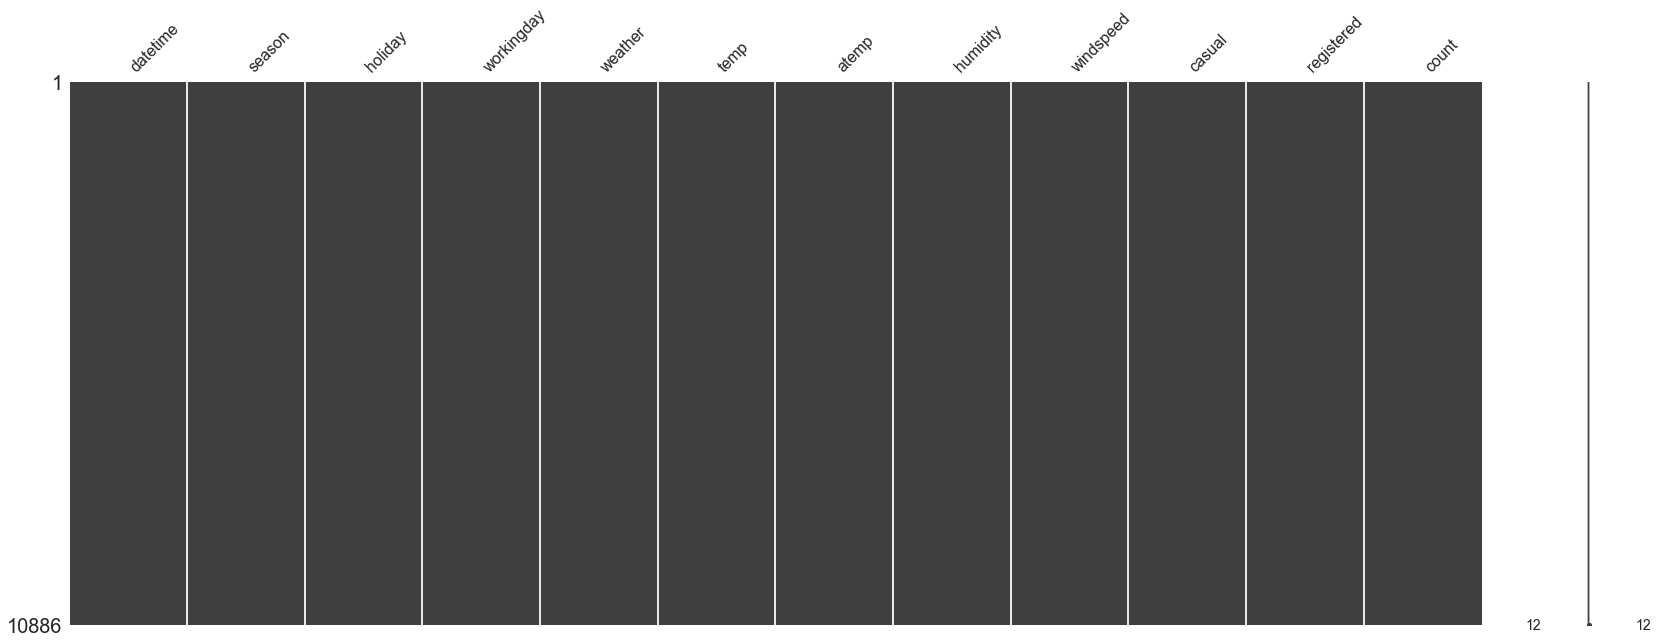

In [5]:
msno.matrix(df)

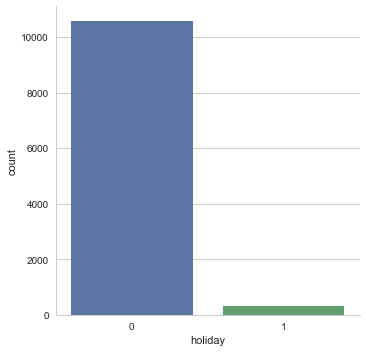

In [6]:
df.holiday.value_counts()

sns.factorplot(x = 'holiday', data = df, kind = 'count', size=5, aspect =1)

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


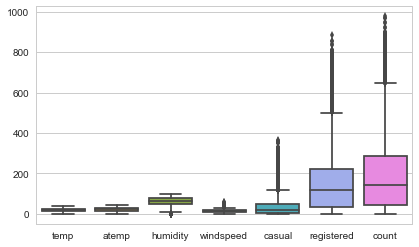

In [8]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])

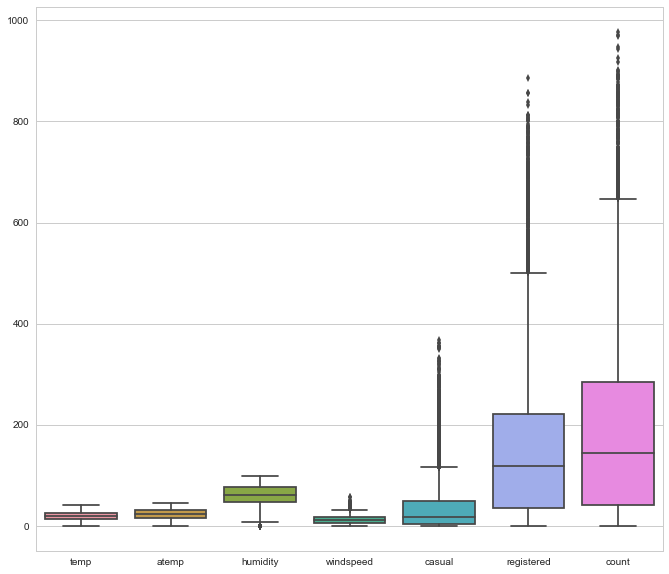

In [9]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf().set_size_inches(10,10)

In [10]:
corr_mat = df.corr()

In [11]:
mask = np.array(corr_mat)

In [12]:
mask[np.tril_indices_from(mask)] = False

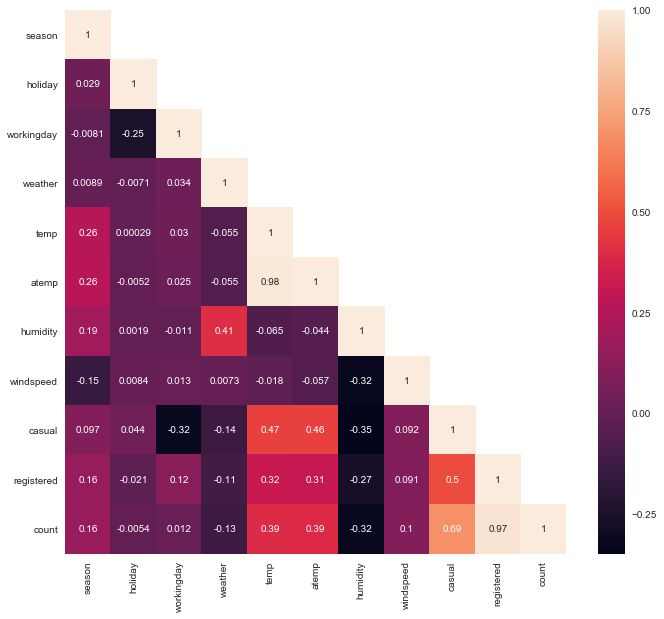

In [13]:
sns.heatmap(data = corr_mat, mask= mask, annot= True, cbar=True)
fig = plt.gcf().set_size_inches(10,10)

In [14]:
season = pd.get_dummies(data= df['season'], prefix='season')
df = pd.concat([df,season], axis = 1)

In [15]:
season = pd.get_dummies(data= test_df['season'], prefix='season')
test_df = pd.concat([test_df,season], axis = 1)

In [16]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)

In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [18]:
df.drop(['season', 'weather'], inplace=True, axis = 1)

In [19]:
test_df.drop(['season', 'weather'], inplace=True, axis = 1)

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [21]:
df["hour"] = df['datetime'].dt.hour
df["day"] = df['datetime'].dt.day
df["month"] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [22]:
df.drop('datetime',axis =1 ,inplace = True)

In [23]:
df.tail()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
10881,0,1,15.58,19.695,50,26.0027,7,329,336,0,...,0,1,1,0,0,0,19,19,12,2012
10882,0,1,14.76,17.425,57,15.0013,10,231,241,0,...,0,1,1,0,0,0,20,19,12,2012
10883,0,1,13.94,15.910,61,15.0013,4,164,168,0,...,0,1,1,0,0,0,21,19,12,2012
10884,0,1,13.94,17.425,61,6.0032,12,117,129,0,...,0,1,1,0,0,0,22,19,12,2012
10885,0,1,13.12,16.665,66,8.9981,4,84,88,0,...,0,1,1,0,0,0,23,19,12,2012


In [24]:
test_df["hour"] = test_df['datetime'].dt.hour
test_df["day"] = test_df['datetime'].dt.day
test_df["month"] = test_df['datetime'].dt.month
test_df['year'] = test_df['datetime'].dt.year
test_df.drop('datetime',axis =1 ,inplace = True)

In [25]:
corr_mat = df.corr()

In [27]:
mask = np.array(corr_mat)

In [28]:
mask[np.tril_indices_from(mask)] = False

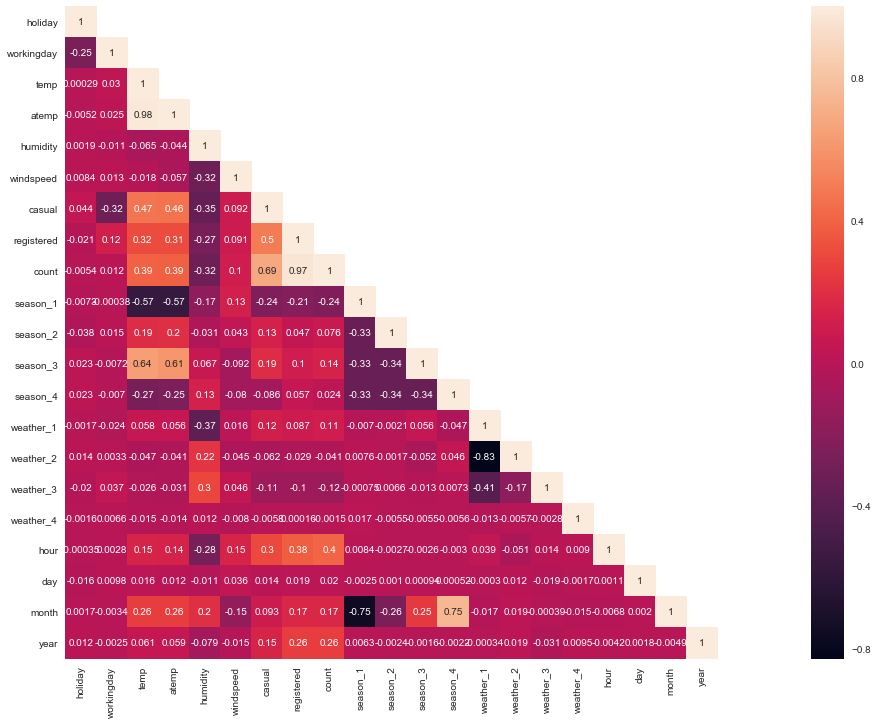

In [31]:
plt.gcf().set_size_inches(30,12)
sns.heatmap(data = corr_mat, mask = mask, annot= True, square = True)


In [32]:
df.drop(['casual','registered'],axis=1,inplace=True)

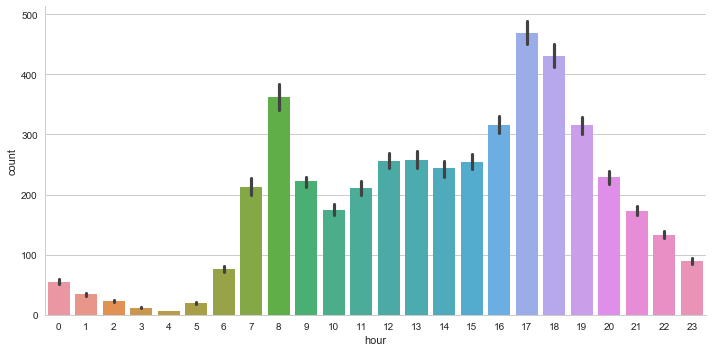

In [36]:
sns.factorplot(data = df, x = 'hour', y = 'count', kind = 'bar', size = 5, aspect = 2)
# factor plot gives average

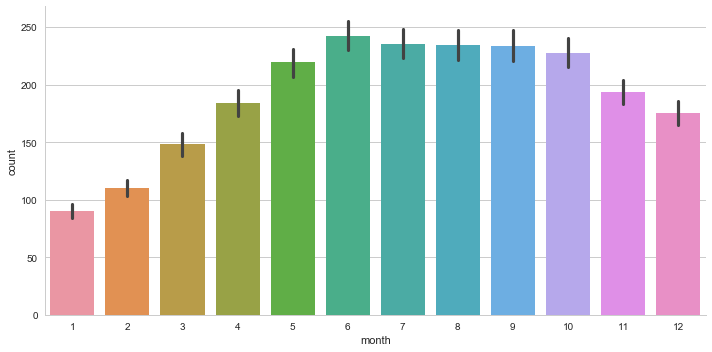

In [42]:
   sns.factorplot(data = df, x = 'month', y = 'count', kind = 'bar', size = 5, aspect = 2)

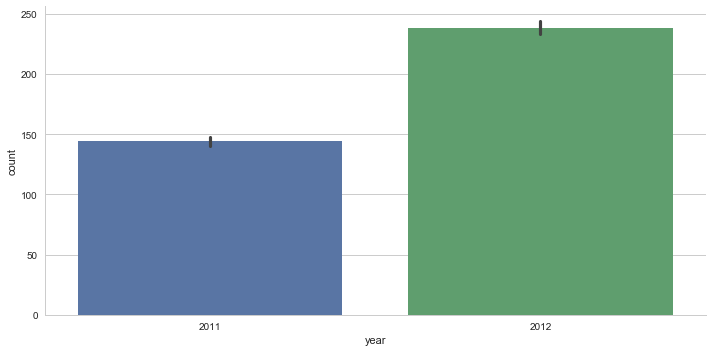

In [43]:
   sns.factorplot(data = df, x = 'year', y = 'count', kind = 'bar', size = 5, aspect = 2)

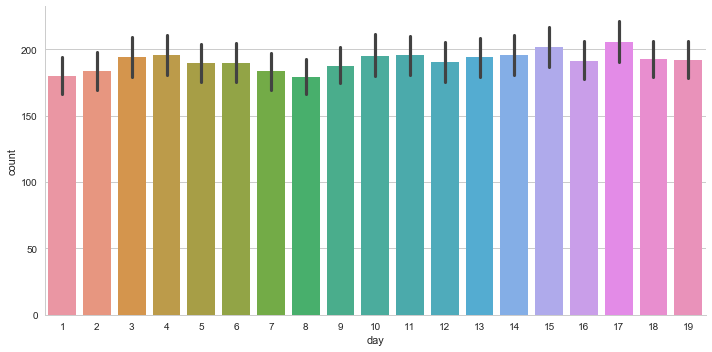

In [44]:
   sns.factorplot(data = df, x = 'day', y = 'count', kind = 'bar', size = 5, aspect = 2)

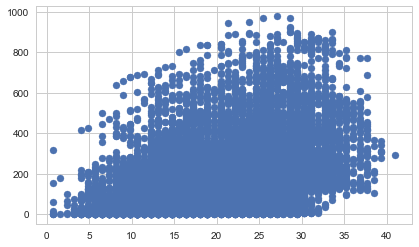

Correlation : 0.39445364496725355


In [56]:
# for numerical variable with count

plt.scatter(data = df, x = 'temp', y = 'count')
plt.show()
print('Correlation :',df[['temp','count']].corr()['count'][0])

In [58]:
# This is very hard to visualize so creating intervals in temperature and using the bins
new_df = df.copy()
new_df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [64]:
new_df['temp_bin'] = np.floor(new_df['temp'])//5

In [66]:
new_df['temp_bin'].value_counts()

5.0    2254
2.0    2134
4.0    2080
3.0    1915
1.0    1130
6.0    1051
7.0     192
0.0     129
8.0       1
Name: temp_bin, dtype: int64

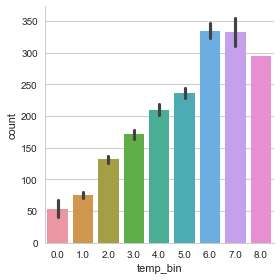

In [69]:
sns.factorplot(data = new_df, x = 'temp_bin', y = 'count', kind = 'bar')

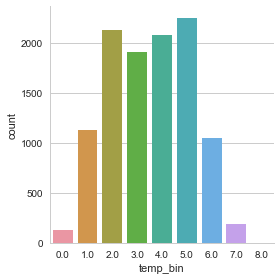

In [70]:
sns.factorplot(data = new_df, x = 'temp_bin', y = 'count', kind = 'bar', estimator= len)

In [75]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('uint8'): Index(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
        'weather_2', 'weather_3', 'weather_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month',
        'year'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

In [76]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('count', axis =1), df['count'], test_size = 0.25, random_state = 11)

In [106]:
models = [
    RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), SVR(), KNeighborsRegressor(), XGBRegressor()
]

model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor','XGBRegressor']

rmsel = []

d = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    test_pred = clf.predict(x_test)
    rmsel.append(np.sqrt(mean_squared_error(test_pred, y_test)))
d = {'Algo':model_names,'RMSE':rmsel}

In [107]:
d

{'Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor',
  'XGBRegressor'],
 'RMSE': [44.70466745690024,
  104.79428456986076,
  46.91977109041641,
  188.81572150153605,
  126.7387839353708,
  67.66958128735253]}

In [103]:
# Best is random Forest regressor
params_dict = {'n_estimators':[1000], 'n_jobs':[-1], 'max_features':["auto",'sqrt','log2'], 'max_depth':[8,9,10,11,12,15,18]}
clf_cv = GridSearchCV(estimator= RandomForestRegressor(), param_grid= params_dict, cv = 5, verbose = 100, 
                      scoring = 'neg_mean_squared_log_error')
clf_cv.fit(x_train, y_train)
pred = clf_cv.predict(x_test)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] max_depth=8, max_features=auto, n_estimators=1000, n_jobs=-1 ....
[CV]  max_depth=8, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.20738706478185426, total=   2.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[CV] max_depth=8, max_features=auto, n_estimators=1000, n_jobs=-1 ....
[CV]  max_depth=8, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.1810435283403519, total=   2.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s
[CV] max_depth=8, max_features=auto, n_estimators=1000, n_jobs=-1 ....
[CV]  max_depth=8, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.1905121452470886, total=   2.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s remaining:    0.0s
[CV] max_depth=8, max_features=auto, n_estimators=1000, n_jobs=-1 ....
[CV]  max_depth=8, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.197876458

[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.14230102380191662, total=   2.5s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  1.2min remaining:    0.0s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.148147056838644, total=   2.7s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.2min remaining:    0.0s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.1522117995633387, total=   2.7s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  1.3min remaining:    0.0s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.1543376942240008, total=   2.5s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min remaining:    0.0s
[CV] max_depth=10, max_feat

[CV]  max_depth=12, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.13932935027419052, total=   3.2s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.5min remaining:    0.0s
[CV] max_depth=12, max_features=auto, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=12, max_features=auto, n_estimators=1000, n_jobs=-1, score=-0.14003823868866946, total=   3.1s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  2.6min remaining:    0.0s
[CV] max_depth=12, max_features=sqrt, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=12, max_features=sqrt, n_estimators=1000, n_jobs=-1, score=-0.457438711279728, total=   1.8s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:  2.6min remaining:    0.0s
[CV] max_depth=12, max_features=sqrt, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=12, max_features=sqrt, n_estimators=1000, n_jobs=-1, score=-0.4662429979970519, total=   1.7s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:  2.7min remaining:    0.0s
[CV] max_depth=12, max_fea

[CV]  max_depth=18, max_features=sqrt, n_estimators=1000, n_jobs=-1, score=-0.39480054077444704, total=   2.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  4.1min remaining:    0.0s
[CV] max_depth=18, max_features=sqrt, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=18, max_features=sqrt, n_estimators=1000, n_jobs=-1, score=-0.39384605940563944, total=   1.8s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:  4.1min remaining:    0.0s
[CV] max_depth=18, max_features=sqrt, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=18, max_features=sqrt, n_estimators=1000, n_jobs=-1, score=-0.3812839742840836, total=   2.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:  4.2min remaining:    0.0s
[CV] max_depth=18, max_features=sqrt, n_estimators=1000, n_jobs=-1 ...
[CV]  max_depth=18, max_features=sqrt, n_estimators=1000, n_jobs=-1, score=-0.3760554315282802, total=   1.9s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:  4.2min remaining:    0.0s
[CV] max_depth=18, max_fe

In [108]:
pred=clf_cv.predict(test_df)

In [109]:
pred

array([ 12.52266667,   6.35743939,   6.63904762, ..., 137.482     ,
       110.8035    ,  79.17253333])

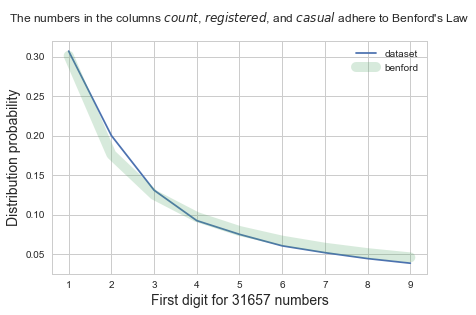

In [111]:
import csv
from collections import defaultdict
from math import log10

d = defaultdict(int)
for e, row in enumerate(csv.DictReader(open("train.csv"))):
	d[row["count"][0]] += 1
	d[row["registered"][0]] += 1
	d[row["casual"][0]] += 1

#Dont count zero as a starting digit
del d["0"]

#Scaling
total_numbers = sum(d.values())
d = sorted([(d[k]/float(total_numbers),k) for k in d],reverse=True)

#Comparison
benford = [(log10(1+1.0/i),str(i)) for i in range(1,10)]

#Plot first digit distribution vs. Benford
plt.plot([x[0] for x in d],label='dataset')
plt.plot([x[0] for x in benford],label='benford',linewidth=10,alpha=0.23)

plt.ylabel("Distribution probability", fontsize=14)
plt.xlabel("First digit for %s numbers"%total_numbers, fontsize=14)
plt.title("The numbers in the columns $count$, $registered$, and $casual$ adhere to Benford's Law\n", fontsize=12)
plt.xticks([x for x in range(len(d))],[int(x[1]) for x in d])
plt.legend()